#### Bayesian inference and Data assimilation SS2023

# Exercise 6 sample sample solution

#### Jin W. Kim (jin.won.kim@uni-potsdam.de)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

#### compute \begin{equation} \int_0^1 \sqrt{1-x^2} dx \end{equation} using different numerical approximation scheme.

In [2]:
"Midpoint rule implementation"
def f(x):
    return np.sqrt(1-x*x)    #This is already vectorized, so no need to vectorize

def eval_midpoint_rule(f,M):
    value = 0.
    for i in range(M):
        value += f((i+0.5)/M)/M
    return [M,value]

In [3]:
"Compute the midpoint rule for M=2 to 50"
tmp = []
for M in range(2,50):
    tmp.append(eval_midpoint_rule(f,M))
result = np.array(tmp)

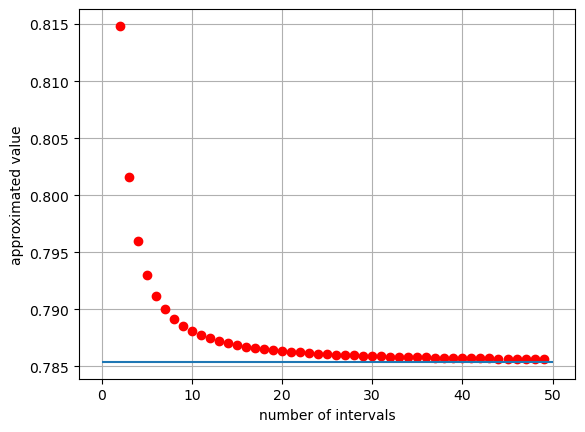

In [4]:
"Plot the result"
plt.plot(result[:,0],result[:,1],'ro')
plt.xlabel('number of intervals')
plt.ylabel('approximated value')
plt.hlines(np.pi/4,0,50)
plt.grid()

In [5]:
"Use Gaussian quadrature rule"
result_Gaussian = (4/9)*f(0) + (5/18)*f(np.sqrt(3/5)) + (5/18)*f(-np.sqrt(3/5))

In [6]:
"Compare the result"
print("The Gaussian quadrature point with 3 function evaluations gives {:6.4f}".format(result_Gaussian))
print("The error was {:6.4f}, while the midpoint rule with M=3 has error {:6.4f}".format(
    np.abs(result_Gaussian-np.pi/4), np.abs(eval_midpoint_rule(f,3)[1]-np.pi/4)))

The Gaussian quadrature point with 3 function evaluations gives 0.7958
The error was 0.0104, while the midpoint rule with M=3 has error 0.0162


In [7]:
"Monte-Carlo implementation"
def eval_MonteCarlo(M):
    xy = np.random.uniform (0,1,(2,M)) #Draw 2 x M samples of (x,y)
    value = xy[0,:]*xy[0,:] + xy[1,:]*xy[1,:]
    num_hits = (value <= 1).sum()    # each element of (value <= 1) will be either true or false. Sum will give the number of trues  
    return [M,num_hits/M]

In [8]:
"Compute the Monte-Carlo for M=10 to 500"
tmp = []
for M in range(10,501,10):
    tmp.append(eval_MonteCarlo(M))
result = np.array(tmp)

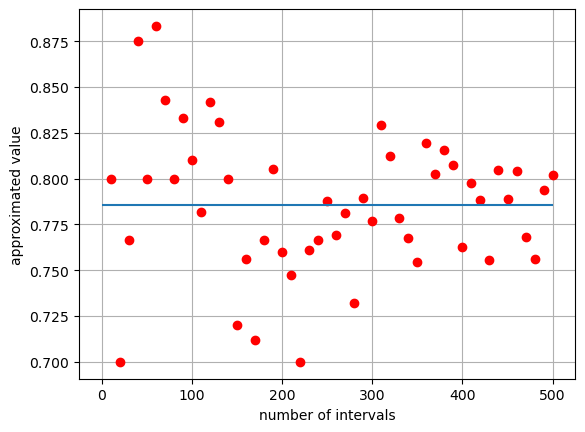

In [9]:
"Plot the result"
plt.plot(result[:,0],result[:,1],'ro')
plt.xlabel('number of intervals')
plt.ylabel('approximated value')
plt.hlines(np.pi/4,0,500)
plt.grid()

In [10]:
"Comparison between midpoint rule and Monte-Carlo"
monte_err  = np.abs(eval_MonteCarlo(100000)[1] - np.pi/4)

M=2
while(1):   
    if eval_midpoint_rule(f,M)[1] - np.pi/4 < monte_err:   #omitted abs() because we know it is bigger than the true value
        break
    M += 1

print("The error of Monte Carlo method was {:8.6f}".format(monte_err))
print("It is beaten by the midpoint rule with {:} function evaluations".format(M))
    

The error of Monte Carlo method was 0.000212
It is beaten by the midpoint rule with 55 function evaluations


#### The error of Monte-Carlo simulation changes, but it is much less efficient in terms of number of function evaluations by far.

## Problem 2

#### 2.1.
The mean of $f(X)$ is obtained by \begin{align*}\mathbb{E}[f(X)] &= \mathbb{E}[1+2X+X^2] \\&= 1 + 2\mathbb{E}[X]+ \mathbb{E}[X^2]\end{align*} We exploit the fact that $\mathbb{E}[X^2] = \text{Var}[X]+\mathbb{E}[X]^2$, and therefore \begin{equation}\mathbb{E}[f(X)] = 1+2+4 = 7 \end{equation}

The variance can be obtained by various ways. One can use (1) the direct computation using the pdf of a normal random variables; (2) exploit that $f(X) = (X-1)^2 + 4(X-1) + 4$, and use the property of centered Gaussian random variables; (3) use the table of higher moments.

We take the second approach. Since $X-1$ is a Gaussian random variable with mean 0, $(X-1)^2$ and $(X-1)$ are uncorrelated. The constant shift can be ignored. Therefore, \begin{equation}\text{Var}[f(X)] = \text{Var}[(X-1)^2] + \text{Var}[4(X-1)] \end{equation} The distribution of the square of a Gaussian random variable with mean 0 is called the chi-square distribution, and its variance is given by $2\text{Var}[X-1]^2$. Henceforth,
\begin{equation}\text{Var}[f(X)] = 2\cdot3^2 + 4^2\cdot3 = 66 \end{equation} 

In [11]:
"Implementation of the Monte-Carlo mean"
def eval_MC_mean(M,N):
    x = np.random.normal(1,np.sqrt(3),(M,N))    #scale is the square-root of the variance
    f_M = (1 + 2*x + x*x).mean(axis=0)
    return f_M        #output (N,) array of the mean of f(X) over M samples

In [12]:
"Simulate for M = 2^0 to 2^8"
tmp = []
for i in range(9):
    M = 2**i
    tmp.append(eval_MC_mean(M,10000))
result = np.array(tmp)
mean = result.mean(axis=1)
var = result.var(axis=1)      #use built-in variance function for numpy array. Uses unbiased empirical variance. See documentation.

Text(0.5, 1.0, 'Variance')

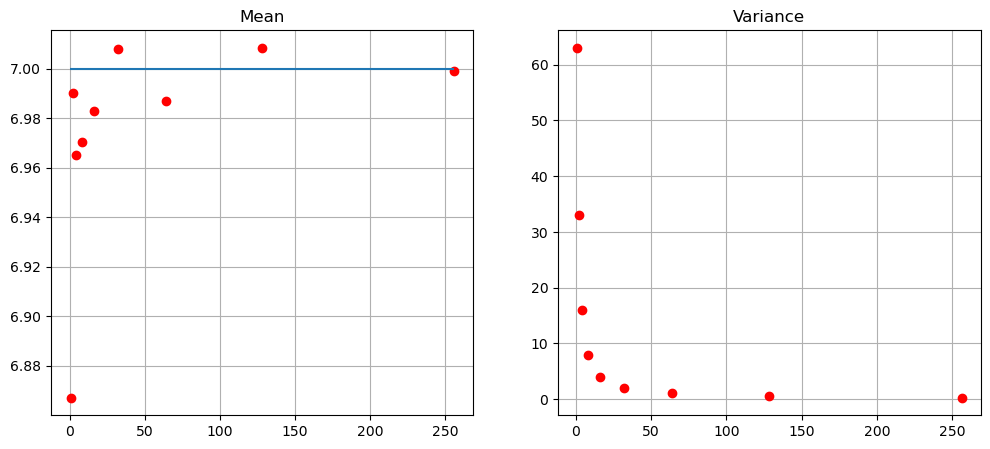

In [13]:
"Plot the results"
M = [2**i for i in range(9)]
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(M,mean,'ro')
ax1.hlines(7,0,256)
ax1.grid()
ax1.set_title("Mean")
ax2.plot(M,var,'ro')
ax2.grid()
ax2.set_title("Variance")

The mean is essentially the empirical mean among $M\cdot N$ samples, and therefore they are scattered around the true mean (7). The variance has relatively consistant tendency to decay towards zero.